# 데이터 준비하기
생선의 길이와 생선의 무게를 사용 하게 될텐데 일일이 입력하게 되면 오타가 발생할 수 있기 때문에 해당 링크로 이동해서 데이터를 복사하세요.
### http://bit.ly/bream_smelt


In [1]:
# 생선 길이
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
                
# 생선 무게
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

전에는 이 파이썬 리스트를 순회하면서 원소를 하나씩 꺼내 생선 하나의 길이와 무게를 리스트 안의 리스트로 직접 구성했습니다. 하지만 넘파이를 배웠으니 훨씬 간편하게 만들 수 있습니다. 우선 넘파이를 임포트 합니다.

In [2]:
import numpy as np

넘파이의 column_stack() 함수는 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결 합니다. 예를 들면 다음과 같은 간단한 2개의 리스트를 나란히 붙여 보죠. 연결할 리스트는 파이썬 튜플(tuple)로 전달합니다.

파이썬 튜플은 리스트와 매우 비슷합니다. 리스트처럼 원소에 순서가 있지만 한 번 만들어진 튜플은 수정할 수 없습니다. 튜플을 사용하면 함수로 전달한 값이 바뀌지 않는다는 것을 믿을 수 있기 때문에 매개변수 값으로 많이 사용합니다.

In [3]:
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

[1,2,3]과 [4,5,6] 두 리스트를 일렬로 세운 다음 나란히 옆으로 붙였습니다. 만들어진 배열은 (3,2) 크기의 배열입니다. 즉 3개의 행이 있고 2개의 열이 있습니다. 그럼 이제 fish_length와 fish_weight를 합치겠습니다.

In [4]:
fish_data = np.column_stack((fish_length, fish_weight))

두 리스트가 잘 연결되었는지 처음 5개의 데이터를 확인해 볼까요?

In [5]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


np.ones()와 np.zeros() 함수의 예를 들면 다음과 같습니다

In [6]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [7]:
print(np.zeros(5))

[0. 0. 0. 0. 0.]


np.concatenate() 함수를 사용해 타깃 데이터를 만들어 보겠습니다.

In [8]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [9]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


train_test_split() 함수는 사잌ㅅ런의 model_selection 모듈 아래 있으며 다음과 같이 임포트 합니다.

In [10]:
from sklearn.model_selection import train_test_split

사용법은 아주 간단합니다. 나누고 싶은 리스트나 배열을 원하는 만큼 전달하면 됩니다. 이 예제에서는 fish_data와 fish_target을 나누겠습니다. 전에는 데이터를 무작위로 섞기 전에 np.random_seed() 함수를 사용해 어려분의 출력 결과와 같아지도록 만들었습니다. 순전히 교육적인 목적입니다. train_test_split() 함수에는 친절하게도 자체적으로 랜덤 시드를 지정할 수 있는 random_state 매개변수가 있습니다. 다음과 같이 훈련 세트와 테스트 세트를 나눕니다.

In [11]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

fish_data와 fish_target 2개의 배열을 전달했으므로 2개씩 나뉘어 총 4개의 배열이 반환됩니다. PPT에서 그림으로 자세히 보겠습니다.

넘파이 배열의 shape 속성으로 입력 데이터의 크기를 출력해 보겠습니다.

In [12]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [13]:
print(train_target.shape, test_target.shape)

(36,) (13,)


훈련 데이터와 테스트 데이터를 각각 36개와 13개로 나누었습니다. 입력 데이터는 2개의 열이 있는 2차원 배열이고 타킷 데이터는 1차원 배열입니다.

그럼 도미와 빙어가 잘 섞였는지 테스트 데이터를 출력해 보겠습니다

In [14]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


자세한 설정은 PPT에서 하겠습니다

샘플링 비율을 맞추기 위해 stratify 매개변수를 사용해 보겠습니다

In [15]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [16]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


빙어가 하나 늘었습니다. 이제 테스트 세트의 비율이 2.25:1이 되었습니다. 이 예제는 데이터가 작아 전체 훈련 데이터의 비율과 동일하게 맞출 수 없지만 꽤 비슷한 비율입니다.

k-최근접 이웃 훈련

In [17]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

완벽한 결과입니다. 테스트 세트의 도미와 빙어를 모두 올바르게 분류했습니다. 이 모델에 김 팀장이 알려준 도미 데이터를 넣고 결과를 확인해 보겠습니다.

In [18]:
print(kn.predict([[25,150]]))

[0.]


정말 이렇게 큰 빙어가 있는 걸까요? 이 샘플을 다른 데이터와 함께 산점도로 그려 보겠습니다. 눈으로 보면 확실하게 보일테니깐요

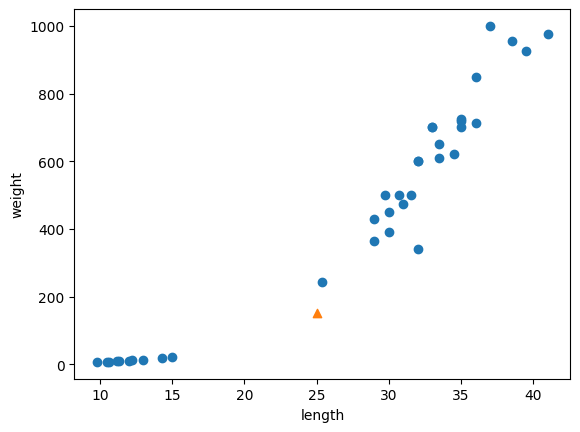

In [19]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^') # marker 매개변수는 모양을 지정합니다.
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

PPT에서 자세히 설명하겠습니다다

kneighbors() 메서드는 이웃까지의 거리와 이웃 샘플의 인덱스를 반환 합니다. KNeighborsClassifier 클래스의 이웃 개수인 n_neighbors의 기본값은 5이므로 5개의 이웃이 반환됩니다.

In [20]:
distances, indexes = kn.kneighbors([[25, 150]])

이전에 넘파이 배열 인덱싱을 배웠습니다. 여기에서도 동일한 방법을 사용할 수 있습니다. indexes 배열을 사용해 훈련 데이터 중에서 이웃 샘플을 따로 구분해 그려 보겠습니다.

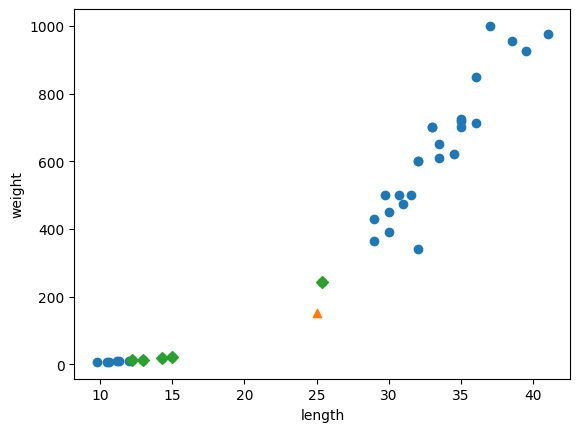

In [21]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

PPT에서 설명하겠습니다

직접 데이터를 확인해보겠습니다.

In [22]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


확실히 가장 가까운 생선 4개는 빙어(0)인 것 갔습니다. 타깃 데이터로 확인하면 더 명확합니다.

In [23]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


PPT에서 설명하겠습니다.

distances 배열을 확인해 보겠습니다.

In [24]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


혹시 출력된 값에서 이상한 점이 보이시나요? PPT에서 자세히 확인 하겠습니다.

xlim()함수를 사용해서 x축의 범위를 조절하겠습니다

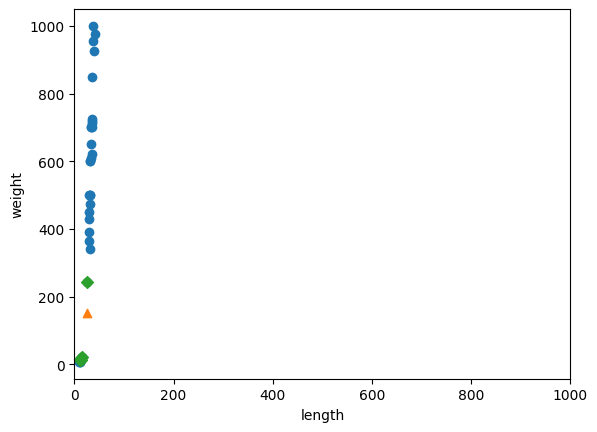

In [25]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

PPT에서 자세히 설명하겠습니다

표준점수 계산하기

In [26]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

계산된 평균과 표준편차를 출력해 보겠습니다

In [27]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


각 특성마다 평균과 표준편차가 구해졌습니다. 이제 원본 데이터에서 평균을 빼고 표준편차로 나누어 표준점수로 변환하겠습니다.

In [28]:
train_scaled = (train_input - mean) / std

PPT에서 자세히 설명 하겠습니다다

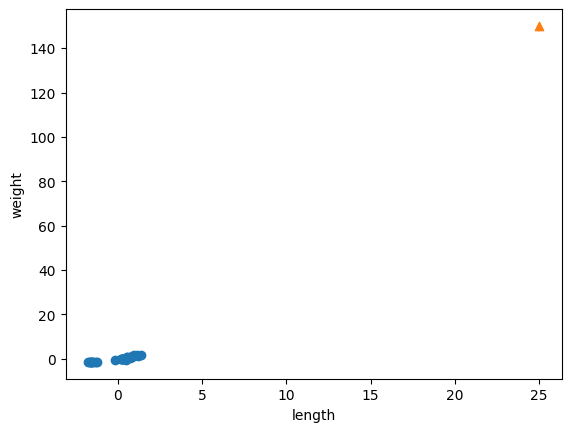

In [29]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

PPT에서 자세히 설명 하겠습니다.

다시 산점도를 그려보겠습니다

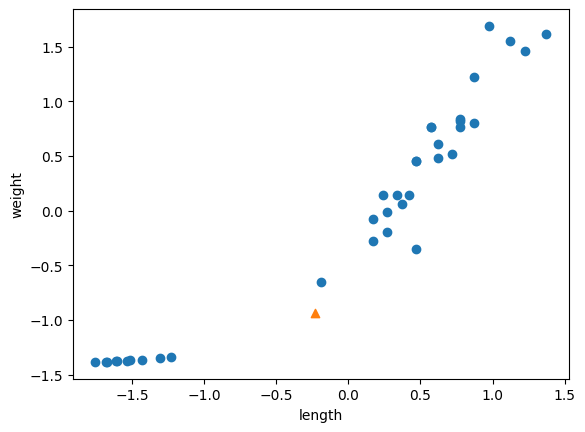

In [30]:
new = ([25, 150] - mean ) / std
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

PPT에서 자세히 설명하겠습니다

k-최근접 이웃 모델을 다시 훈련해 보겠습니다

In [31]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

훈련을 마치고 테스트 세트로 평가할 때는 주의해야 합니다. 앞서 김 팀장의 수상한 샘플을 훈련 세트의 평균과 표준편차로 변환해야지 같은 비율로 산점도를 그릴 수 있습니다. 마찬가지로 테스트 세트도 훈련 세트의 평균과 표쥰편차로 변환해야 합니다. 그렇지 않다면 데이터의 스케일이 같아지지 않으므로 훈련한 모델이 쓸모없게 됩니다. 그럼 테스트 세트의 스케일을 변환해 보죠.

In [32]:
test_scaled = (test_input - mean) / std

In [33]:
kn.score(test_scaled, test_target)

1.0

드디오 도미(1)로 예측했습니다. 확실히 길이가 25cm이고 무게가 150g인 생선은 도미일 것입니다.

마지막으로 kneighbors() 함수로 이 샘플의 k-최근접 이웃을 구한 다음 산점도로 그려 보겠습니다. 특성을 표준점수로 바꾸었기 때문에 k-최근접 이웃 알고리즘이 올바르게 거리를 측정했을 것입니다. 이로 인해 가장 가까운 이웃에 변화가 생겼을 것으로 기대할 수 있습니다.

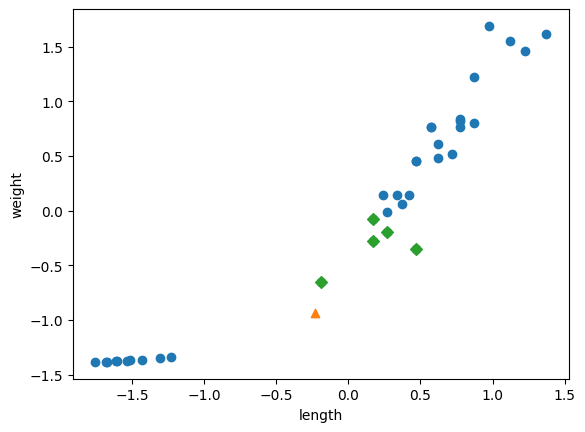

In [34]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

PPT에서 자세히 설명하겠습니다.